# Discrete logarithm problem

This problem arises in many fields in cryptography and this is why it is worth having a quick look on it. Roughly speaking is the problem of finding $k$ such that $a^k$(mod $p$)=$n$ where we know $a$, $k$ and $p$. This may seem a super simple problem (it is if we don't work in the modulo operation but in plain real numbers) but as we will see finding $i$ is a brute force task. 


First of all we have to choose a  prime number $p$ 

In [1]:
# p is a large prime number
p = (int)(1e9+7)  
print(p)

1000000007


We require to calculate large integer powers, for instance 23456^99999 (mod $p$), this will blow our computer!. One way to calculate this could be multiplying 23456 by itself 99999 times and apply the operation (mod $p$) every time we multiply but this turns out to be still slow. A better way is the fast powering algorithm (see [An Introduction to Mathematical Cryptography](https://www.springer.com/gp/book/9781493917105)). 

In [2]:
def fastPowering(a,k,p):
    """
    Fast powering algorithm
    a in $Z_p$ and integers 0 <= k <= p
    p is a large prime number
    
    returns:
    a^k (mod p)
    
    Note: exactly the same as pow(a,k,p) implemented in python
    """
    b = 1
    if k == 0:
        return b
    A = a
    # If the least significant bit is 1, $a^1 = a$
    if 1 & k:
        b = a
    k = k >> 1
    while k:
        A = (A**2) % p
        if 1 & k:
            b = (b * A) % p
        k = k >> 1
    return b

This algorithm is the same as the one coded in pow() function in python, we check it gives the same result

In [3]:
a = 50
k = 9999999

assert pow(a,k,p) == fastPowering(a,k,p), "operation is not the same" #check if the operation is the same

Let's take base "a=627" and prime number "p=941" and plot for every "i" the power result

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

a = 627
p = 941

x = list()
y = list()

for i in range(0, 270):
    x.append(i)
    y.append(fastPowering(a,i,p))

<Figure size 432x288 with 0 Axes>

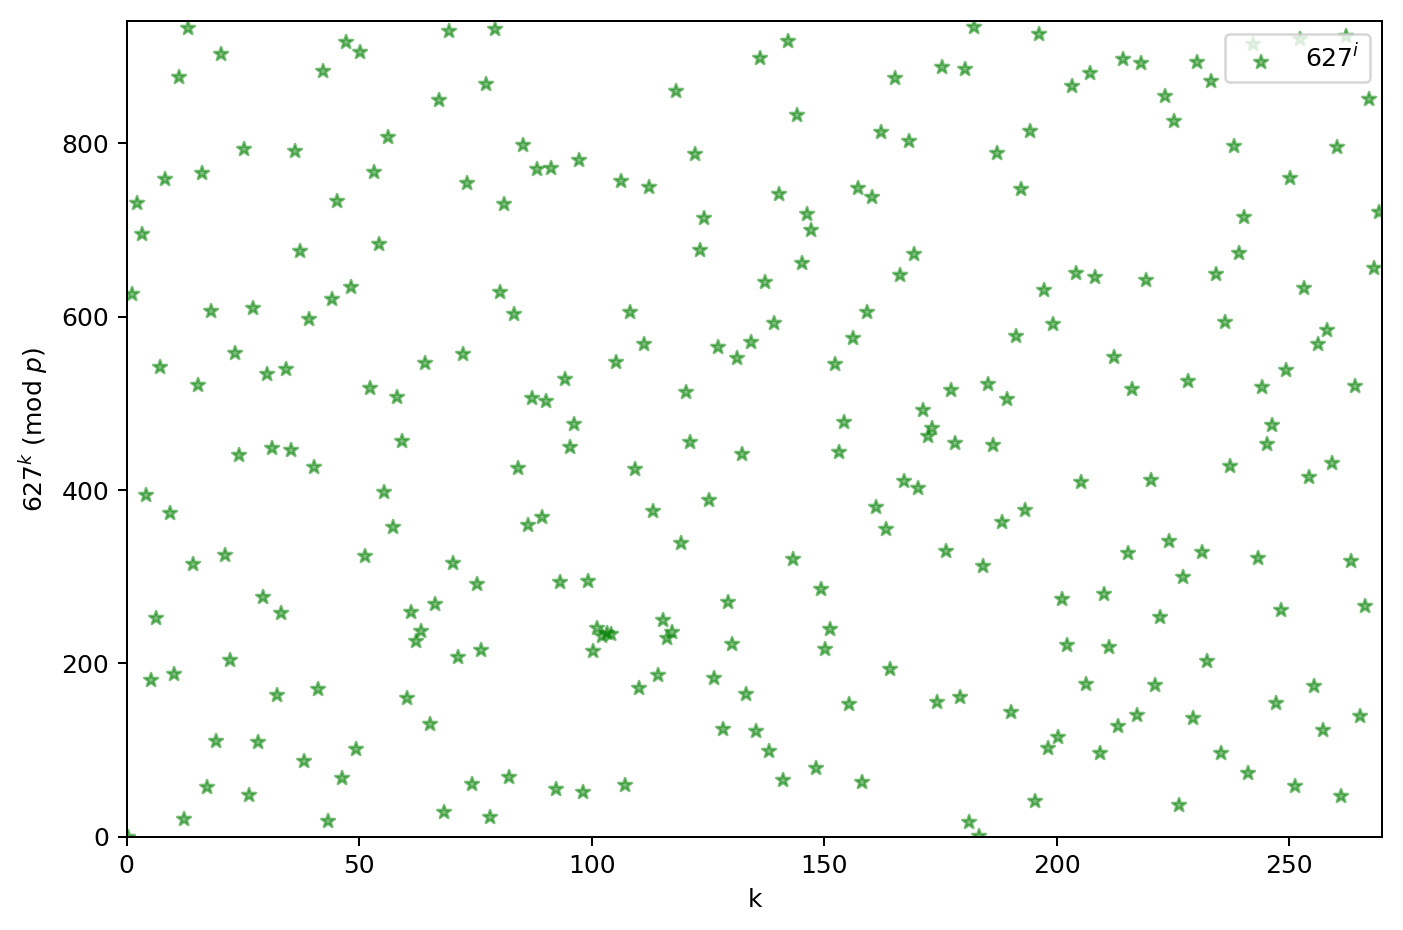

In [6]:
plt.clf()
fig=plt.figure(dpi = 180, figsize=(9,6))

plt.scatter(x, y, c="g", alpha=0.5, marker=r'$\bigstar$',
            label="$627^i$")
plt.xlabel("k")
plt.ylabel("$627^k$ (mod $p$)")
plt.legend(loc='upper right')
plt.ylim((0, 941))
plt.xlim((0, 270))
plt.show()

It is very chaotic!. If I tell you to find the "i" that will give as a result 177 (result is 206), would you find a trivial way to do it?. That is precisely the difficulty of this problem.

The solution $n$ is not unique, i.e. there is more than one $k$ such that $a^k$(mod $p$)=$n$. We can see that from Fermat's litte therorem $a^{p-1}=1$(mod $p$), hence if $k$ is a solution then $k+\phi(p-1)$ is also a solution, where $\phi$ is an natural number.

Let's check this with same $a=627$ and $p=941$ but this time explore $k$ until 99999.

In [8]:
a = 627
p = 941

x = list()
y = list()

for i in range(0, 99999):
    x.append(i)
    y.append(fastPowering(a,i,p))

Let's see for which $k$s we get the same number $n$

In [9]:
#define the function to calculate the next k with same n
k2 = lambda x: k + x*(p-1)

for i in range(1,8):
    k = k2(i)
    print("k={}, n={}".format(x[i], y[i]))

k=1, n=627
k=2, n=732
k=3, n=697
k=4, n=395
k=5, n=182
k=6, n=253
k=7, n=543
